In [1]:
#Karan Veer Singh
#Internship Task 2
#Cognifyz Tech 
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('Dataset .csv')
print(df.shape)
df.head()

(9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
cuis=df['Cuisines'].str.split(',',expand=True).stack().str.strip().reset_index(level=1,drop=True).rename('Cuisine')
tmp=df[['Aggregate rating','Votes']].join(cuis)
print(tmp.head(10))

   Aggregate rating  Votes   Cuisine
0               4.8    314    French
0               4.8    314  Japanese
0               4.8    314  Desserts
1               4.5    591  Japanese
2               4.4    270   Seafood
2               4.4    270     Asian
2               4.4    270  Filipino
2               4.4    270    Indian
3               4.9    365  Japanese
3               4.9    365     Sushi


In [4]:
c_pop=tmp.groupby('Cuisine')['Votes'].sum().sort_values(ascending=False).head(10)
c_rating=tmp.groupby('Cuisine')['Aggregate rating'].mean().round(2).loc[c_pop.index]
print("Top 10 by votes:")
print(c_pop)
print("Avg rating for those:")
print(c_rating)

Top 10 by votes:
Cuisine
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64
Avg rating for those:
Cuisine
North Indian    2.51
Chinese         2.62
Italian         3.56
Continental     3.52
Fast Food       2.56
American        3.66
Cafe            3.32
Mughlai         2.61
Desserts        2.98
Asian           3.82
Name: Aggregate rating, dtype: float64


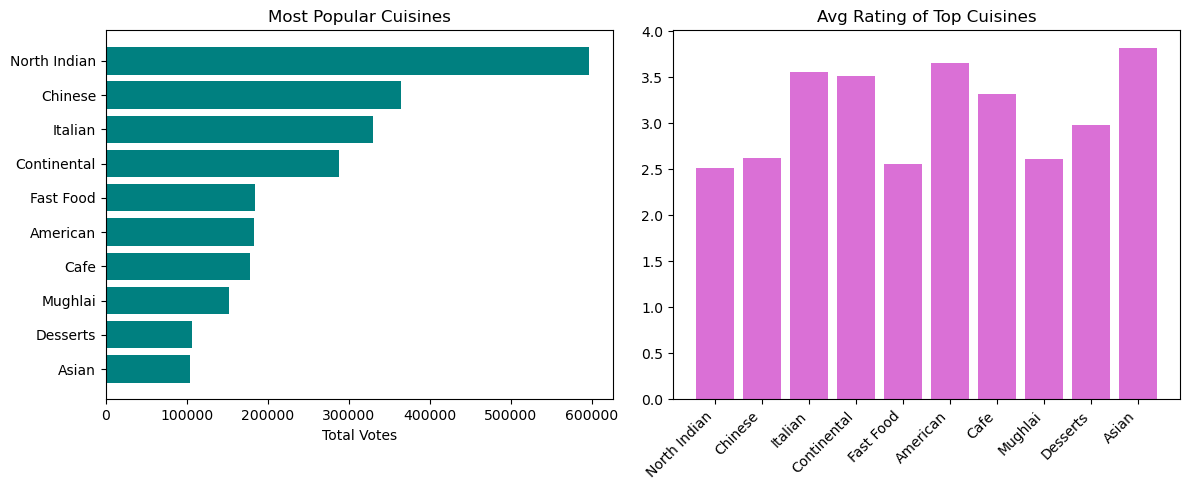

In [10]:
fig,axs=plt.subplots(1,2,figsize=(12,5))
axs[0].barh(c_pop.index[::-1],c_pop.values[::-1],color='teal')
axs[0].set_title('Most Popular Cuisines')
axs[0].set_xlabel('Total Votes')

axs[1].bar(c_rating.index,c_rating.values,color='orchid')
axs[1].set_title('Avg Rating of Top Cuisines')
ticks = range(len(c_rating.index))
axs[1].set_xticks(ticks)
axs[1].set_xticklabels(c_rating.index,rotation=45,ha='right')

plt.tight_layout()
plt.show()

In [6]:
high=tmp.groupby('Cuisine')['Aggregate rating'].agg(['mean','count'])
high=high[high['count']>50].sort_values('mean',ascending=False).head(10)
print('Cuisines with high ratings (>50 entries):')
print(high)


Cuisines with high ratings (>50 entries):
                   mean  count
Cuisine                       
Sandwich       4.066038     53
Steak          3.985484     62
Sushi          3.973333     75
Mediterranean  3.948214    112
Indian         3.918571     70
European       3.910811    148
Seafood        3.862069    174
Asian          3.815021    233
Japanese       3.797037    135
Mexican        3.723204    181


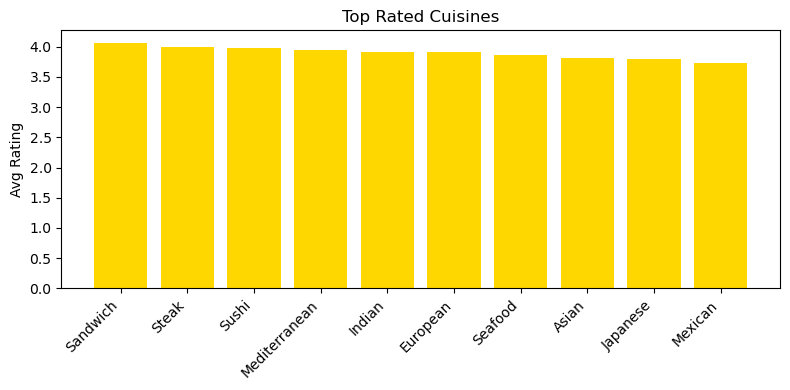

In [7]:
plt.figure(figsize=(8,4))
plt.bar(high.index,high['mean'],color='gold')
plt.title('Top Rated Cuisines')
plt.ylabel('Avg Rating')
plt.xticks(rotation=45,ha='right')
plt.tight_layout();plt.show()